# What is a Random Forest?

## Introduction

A Random Forest classifier is  a machine learning technique that is used classify data. Random Forest classifiers use many Decision Tree models to make a decision. Each Decision Tree model will make a prediction and the prediction that is most common is the output of the Random Forest classifier.

To generate different Decision Trees, the Random Forest classifier will give each Decision Tree a different random subset of the entire dataset (with replacement). This technique is called bootstrap aggregation (also known as bagging).  Within each tree, the features considered at each split will be randomly selected.

By outputting the aggregate result of an ensemble of Decision Trees, Random Forest classifiers are less prone to overfitting In addition, Random Forests allow for regression modelling as the the output is an average of tree predictions.





## Parameters for the model

While certain classification methods such as logistic regression do not require input parameters, a Decision Tree requires some input by the modeler.

The parameters include
*  n estimators: the number of trees in the forest
*  bootstrap: a boolean that indicates whether bootstrapping should be used. If False, then the entire dataset will be used in each tree.
*   Max Depth: this parameter restricts how many decision rules can be used to be used in a classification group
*   Mininum samples split: the minimum number of samples required to split an internal node.
*   Max features: the maximum number of features to consider when looking for the best decision rule at a node. Placing a limit on this number can help interpretability.
* Max leaf nodes: limits the number of leaves of the tree. These leaves represent the classification groups.

A common theme with these parameters is that modelers will pick parameters that may lead to less optimal answers in order to get more interpretable answers.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

import pandas as pd
from imblearn.over_sampling import SMOTE

filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

Accuracy: 0.73485
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83     18297
           1       0.24      0.97      0.38      1703

    accuracy                           0.73     20000
   macro avg       0.62      0.84      0.61     20000
weighted avg       0.93      0.73      0.79     20000



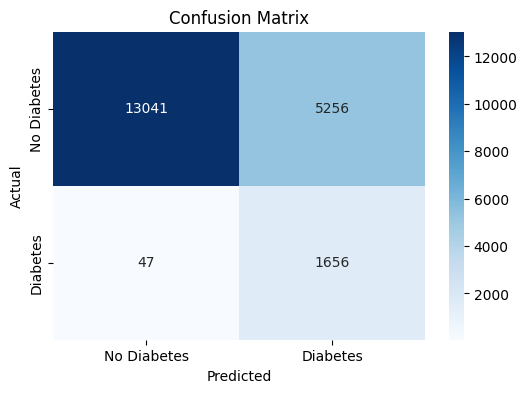

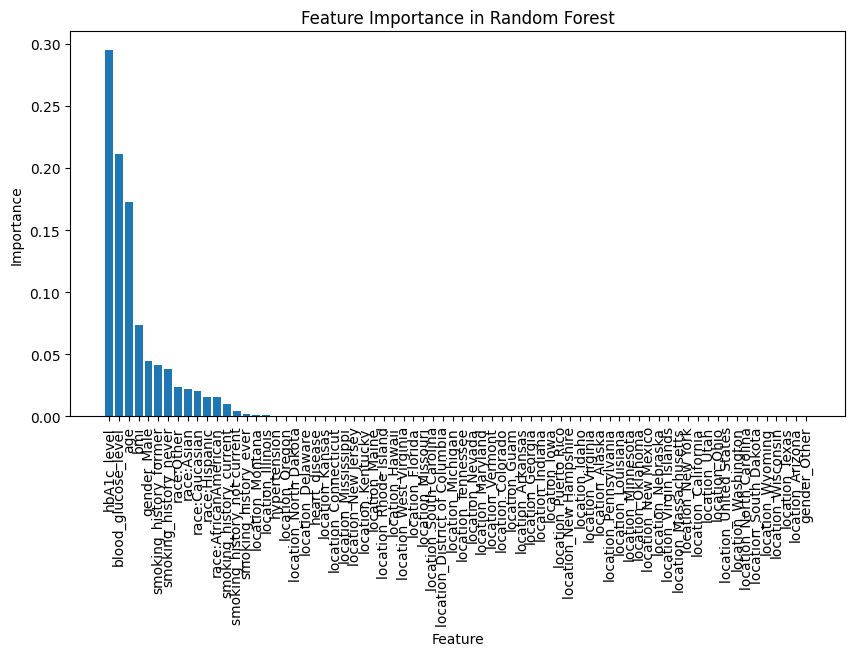

In [ ]:
np.random.seed(42)
n = 1000

df = df.drop(columns=['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=4,class_weight={0: 1, 1: 2})
clf.fit(X_train_balanced, y_train_balanced)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

This model is extremely powerful as it correctly identifies that a person with diabetes has diabetes 97.2% of the time!

## Experiment: Determine how Max_Depth effects Model Recall and Accuracy

In [ ]:
from sklearn.metrics import recall_score

# Store results
depths = list(range(1, 6))
overall_accuracies = []
diabetes_recalls = []

for depth in depths:
    clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=depth, class_weight={0: 1, 1: 2})
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)

    # Overall accuracy
    overall_acc = accuracy_score(y_test, y_pred)
    overall_accuracies.append(overall_acc)

    # Diabetes class recall (sensitivity) — class 1
    diabetes_rec = recall_score(y_test, y_pred, pos_label=1)
    diabetes_recalls.append(diabetes_rec)

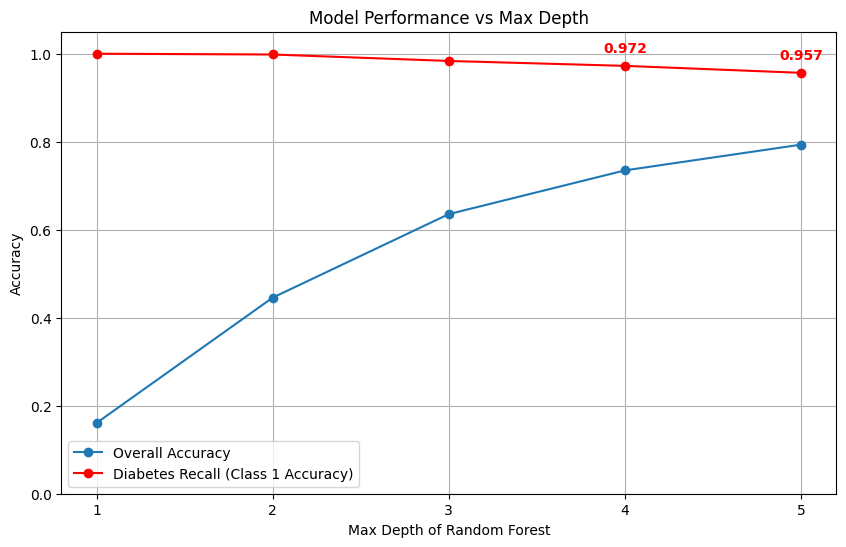

In [ ]:
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(depths, overall_accuracies, marker='o', label='Overall Accuracy')
plt.plot(depths, diabetes_recalls, marker='o', label='Diabetes Recall (Class 1 Accuracy)', color='red')

# Annotate values at depth=4 and depth=5 for Diabetes Recall
for i in [3, 4]:  # Index 3 = depth 4, Index 4 = depth 5
    plt.annotate(f"{diabetes_recalls[i]:.3f}",
                 (depths[i], diabetes_recalls[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

# Final plot touches
plt.xlabel('Max Depth of Random Forest')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Max Depth')
plt.xticks(depths)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()

Looking at the data above, we see that as the max depth of the trees within the random forest increases, the model's accuracy in predicting diabetes or no diabetes increases but the model's accuracy in predicting diabetes alone decreases. With max depth 4 the random forest classifier outperforms the decision tree that has max depth 5 (that was used in the Decision tree demonstration within this Github repo) but also outperforms the decision tree with max depth 4.